In [1]:
# Import relevant libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing 
import matplotlib.pyplot as plt

In [2]:
# Import dataset

test_data = pd.read_csv("testdata.csv")
test_data.head(10)

,Unnamed: 0,WBC 103/mm3,RBC 106/mm3,HB gm/dl,PCV%,MCV%,HB%,MCHC %,RETICS%
0,0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,1,7.4,4.25,13.1,37.0,87.0,30.8,35.4,0.1
2,2,8.6,5.48,11.9,36.7,67.0,21.7,32.4,0.0
3,3,6.1,5.24,16.3,47.0,89.7,31.1,34.7,0.0
4,4,11.2,5.02,14.5,42.1,83.9,28.9,34.4,0.2
5,5,6.0,4.59,13.2,39.9,86.8,28.8,33.1,0.2
6,6,7.2,5.13,15.4,45.5,88.8,30.0,33.8,0.0
7,7,5.0,4.65,14.7,43.2,92.9,31.7,34.1,0.1
8,8,7.1,5.12,15.5,46.9,91.6,30.1,32.9,0.1
9,9,8.3,4.52,14.2,42.5,94.0,31.5,33.5,0.0


### Data exploration and cleaning

In [3]:
test_data.drop(test_data.columns[0], axis=1)
test_data.head()

,Unnamed: 0,WBC 103/mm3,RBC 106/mm3,HB gm/dl,PCV%,MCV%,HB%,MCHC %,RETICS%
0,0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,1,7.4,4.25,13.1,37.0,87.0,30.8,35.4,0.1
2,2,8.6,5.48,11.9,36.7,67.0,21.7,32.4,0.0
3,3,6.1,5.24,16.3,47.0,89.7,31.1,34.7,0.0
4,4,11.2,5.02,14.5,42.1,83.9,28.9,34.4,0.2


In [4]:
# 
test_data.loc[test_data['WBC 103/mm3'].idxmax()]
test_data

,Unnamed: 0,WBC 103/mm3,RBC 106/mm3,HB gm/dl,PCV%,MCV%,HB%,MCHC %,RETICS%
0,0,0.000000e+00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,1,7.400000e+00,4.25,13.1,37.0,87.0,30.8,35.4,0.1
2,2,8.600000e+00,5.48,11.9,36.7,67.0,21.7,32.4,0.0
3,3,6.100000e+00,5.24,16.3,47.0,89.7,31.1,34.7,0.0
4,4,1.120000e+01,5.02,14.5,42.1,83.9,28.9,34.4,0.2
...,...,...,...,...,...,...,...,...,...
8395,8395,3.687825e-40,5.46,17.4,50.1,91.8,31.9,34.7,0.0
8396,8396,3.687825e-40,5.46,17.4,50.1,91.8,31.9,34.7,0.0
8397,8397,3.687825e-40,5.46,17.4,50.1,91.8,31.9,34.7,0.0
8398,8398,3.687825e-40,5.46,17.4,50.1,91.8,31.9,34.7,0.0


In [5]:
# No way for someone to have blood count of zero. 

test_data=test_data[test_data['RBC 106/mm3']!=0]
test_data.head()

,Unnamed: 0,WBC 103/mm3,RBC 106/mm3,HB gm/dl,PCV%,MCV%,HB%,MCHC %,RETICS%
1,1,7.4,4.25,13.1,37.0,87.0,30.8,35.4,0.1
2,2,8.6,5.48,11.9,36.7,67.0,21.7,32.4,0.0
3,3,6.1,5.24,16.3,47.0,89.7,31.1,34.7,0.0
4,4,11.2,5.02,14.5,42.1,83.9,28.9,34.4,0.2
5,5,6.0,4.59,13.2,39.9,86.8,28.8,33.1,0.2


###### Creating classification for blood attibutes ( low, normal, high)

In [6]:
# White blood cell count

WBC_Range=[]

for x in test_data['WBC 103/mm3']:
    if x >10.8:
        WBC_Range.append('High')
    elif x>=4.9 :
        WBC_Range.append('Normal')
    else:
        WBC_Range.append('Low')

test_data['WBC_Range'] = WBC_Range
test_data.head(30)

<ipython-input-6-10ae0bea7355>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['WBC_Range'] = WBC_Range


,Unnamed: 0,WBC 103/mm3,RBC 106/mm3,HB gm/dl,PCV%,MCV%,HB%,MCHC %,RETICS%,WBC_Range
1,1,7.4,4.25,13.1,37.0,87.0,30.8,35.4,0.1,Normal
2,2,8.6,5.48,11.9,36.7,67.0,21.7,32.4,0.0,Normal
3,3,6.1,5.24,16.3,47.0,89.7,31.1,34.7,0.0,Normal
4,4,11.2,5.02,14.5,42.1,83.9,28.9,34.4,0.2,High
5,5,6.0,4.59,13.2,39.9,86.8,28.8,33.1,0.2,Normal
6,6,7.2,5.13,15.4,45.5,88.8,30.0,33.8,0.0,Normal
7,7,5.0,4.65,14.7,43.2,92.9,31.7,34.1,0.1,Normal
8,8,7.1,5.12,15.5,46.9,91.6,30.1,32.9,0.1,Normal
9,9,8.3,4.52,14.2,42.5,94.0,31.5,33.5,0.0,Normal
10,10,6.3,5.11,14.1,42.2,82.7,27.7,33.5,0.0,Normal


In [7]:
# Red blood cell count

RBC_Range=[]

for z in test_data['RBC 106/mm3']:
    if z >6.2:
        RBC_Range.append('High')
    elif z>=4.0 :
        RBC_Range.append('Normal')
    else:
        RBC_Range.append('Low')

test_data['RBC_Range'] = RBC_Range
test_data.head()

<ipython-input-7-e20929fd08e6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['RBC_Range'] = RBC_Range


,Unnamed: 0,WBC 103/mm3,RBC 106/mm3,HB gm/dl,PCV%,MCV%,HB%,MCHC %,RETICS%,WBC_Range,RBC_Range
1,1,7.4,4.25,13.1,37.0,87.0,30.8,35.4,0.1,Normal,Normal
2,2,8.6,5.48,11.9,36.7,67.0,21.7,32.4,0.0,Normal,Normal
3,3,6.1,5.24,16.3,47.0,89.7,31.1,34.7,0.0,Normal,Normal
4,4,11.2,5.02,14.5,42.1,83.9,28.9,34.4,0.2,High,Normal
5,5,6.0,4.59,13.2,39.9,86.8,28.8,33.1,0.2,Normal,Normal


In [8]:
# Haemoglobin grams per decilitre

HB_gm_dl=[]

for c in test_data['HB gm/dl']:
    if c >22:
        HB_gm_dl.append('High')
    elif c>=11 :
        HB_gm_dl.append('Normal')
    else:
        HB_gm_dl.append('Low')

test_data['HB_Range'] = HB_gm_dl
test_data.head()

<ipython-input-8-f059d461db66>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['HB_Range'] = HB_gm_dl


,Unnamed: 0,WBC 103/mm3,RBC 106/mm3,HB gm/dl,PCV%,MCV%,HB%,MCHC %,RETICS%,WBC_Range,RBC_Range,HB_Range
1,1,7.4,4.25,13.1,37.0,87.0,30.8,35.4,0.1,Normal,Normal,Normal
2,2,8.6,5.48,11.9,36.7,67.0,21.7,32.4,0.0,Normal,Normal,Normal
3,3,6.1,5.24,16.3,47.0,89.7,31.1,34.7,0.0,Normal,Normal,Normal
4,4,11.2,5.02,14.5,42.1,83.9,28.9,34.4,0.2,High,Normal,Normal
5,5,6.0,4.59,13.2,39.9,86.8,28.8,33.1,0.2,Normal,Normal,Normal


In [9]:
# Packed cell volume - proportion of blood made up of erythrocytes or RBC

pvc=[]

for v in test_data['PCV%']:
    if v >55:
        pvc.append('High')
    elif v>=36 :
        pvc.append('Normal')
    else:
        pvc.append('Low')

test_data['PVC_Range'] = pvc
test_data.head()

<ipython-input-9-af3fb2d9312c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['PVC_Range'] = pvc


,Unnamed: 0,WBC 103/mm3,RBC 106/mm3,HB gm/dl,PCV%,MCV%,HB%,MCHC %,RETICS%,WBC_Range,RBC_Range,HB_Range,PVC_Range
1,1,7.4,4.25,13.1,37.0,87.0,30.8,35.4,0.1,Normal,Normal,Normal,Normal
2,2,8.6,5.48,11.9,36.7,67.0,21.7,32.4,0.0,Normal,Normal,Normal,Normal
3,3,6.1,5.24,16.3,47.0,89.7,31.1,34.7,0.0,Normal,Normal,Normal,Normal
4,4,11.2,5.02,14.5,42.1,83.9,28.9,34.4,0.2,High,Normal,Normal,Normal
5,5,6.0,4.59,13.2,39.9,86.8,28.8,33.1,0.2,Normal,Normal,Normal,Normal


In [10]:
# Mean Corpuscular Volume -  measure of the average volume of a red blood corpuscle

mcv=[]

for b in test_data['MCV%']:
    if b >96:
        mcv.append('High')
    elif b>=80 :
        mcv.append('Normal')
    else:
        mcv.append('Low')

test_data['MCV_Range'] = mcv
test_data.head()

<ipython-input-10-10d913772a81>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['MCV_Range'] = mcv


,Unnamed: 0,WBC 103/mm3,RBC 106/mm3,HB gm/dl,PCV%,MCV%,HB%,MCHC %,RETICS%,WBC_Range,RBC_Range,HB_Range,PVC_Range,MCV_Range
1,1,7.4,4.25,13.1,37.0,87.0,30.8,35.4,0.1,Normal,Normal,Normal,Normal,Normal
2,2,8.6,5.48,11.9,36.7,67.0,21.7,32.4,0.0,Normal,Normal,Normal,Normal,Low
3,3,6.1,5.24,16.3,47.0,89.7,31.1,34.7,0.0,Normal,Normal,Normal,Normal,Normal
4,4,11.2,5.02,14.5,42.1,83.9,28.9,34.4,0.2,High,Normal,Normal,Normal,Normal
5,5,6.0,4.59,13.2,39.9,86.8,28.8,33.1,0.2,Normal,Normal,Normal,Normal,Normal


In [11]:
# Mean corpuscular hemoglobin concentration

mchc=[]

for n in test_data['MCHC %']:
    if n >36:
        mchc.append('High')
    elif n>=33 :
        mchc.append('Normal')
    else:
        mchc.append('Low')

test_data['MCHC_Range'] = mchc
test_data.head()

<ipython-input-11-0eaea32cdff4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['MCHC_Range'] = mchc


,Unnamed: 0,WBC 103/mm3,RBC 106/mm3,HB gm/dl,PCV%,MCV%,HB%,MCHC %,RETICS%,WBC_Range,RBC_Range,HB_Range,PVC_Range,MCV_Range,MCHC_Range
1,1,7.4,4.25,13.1,37.0,87.0,30.8,35.4,0.1,Normal,Normal,Normal,Normal,Normal,Normal
2,2,8.6,5.48,11.9,36.7,67.0,21.7,32.4,0.0,Normal,Normal,Normal,Normal,Low,Low
3,3,6.1,5.24,16.3,47.0,89.7,31.1,34.7,0.0,Normal,Normal,Normal,Normal,Normal,Normal
4,4,11.2,5.02,14.5,42.1,83.9,28.9,34.4,0.2,High,Normal,Normal,Normal,Normal,Normal
5,5,6.0,4.59,13.2,39.9,86.8,28.8,33.1,0.2,Normal,Normal,Normal,Normal,Normal,Normal


In [12]:
# Reticulocyte count in blood ,  measures the number of new red blood cells in your body

retics=[]

for n in test_data['RETICS%']:
    if n >2:
        retics.append('High')
    elif n>=0.5 :
        retics.append('Normal')
    else:
        retics.append('Low')

test_data['RETICS_Range'] = mchc
test_data.head()

<ipython-input-12-6f35ebbd0aa8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['RETICS_Range'] = mchc


,Unnamed: 0,WBC 103/mm3,RBC 106/mm3,HB gm/dl,PCV%,MCV%,HB%,MCHC %,RETICS%,WBC_Range,RBC_Range,HB_Range,PVC_Range,MCV_Range,MCHC_Range,RETICS_Range
1,1,7.4,4.25,13.1,37.0,87.0,30.8,35.4,0.1,Normal,Normal,Normal,Normal,Normal,Normal,Normal
2,2,8.6,5.48,11.9,36.7,67.0,21.7,32.4,0.0,Normal,Normal,Normal,Normal,Low,Low,Low
3,3,6.1,5.24,16.3,47.0,89.7,31.1,34.7,0.0,Normal,Normal,Normal,Normal,Normal,Normal,Normal
4,4,11.2,5.02,14.5,42.1,83.9,28.9,34.4,0.2,High,Normal,Normal,Normal,Normal,Normal,Normal
5,5,6.0,4.59,13.2,39.9,86.8,28.8,33.1,0.2,Normal,Normal,Normal,Normal,Normal,Normal,Normal


In [13]:
# Select dataset with probable normaal individuals

test_data1 = test_data[(test_data.RBC_Range != 'Low') & (test_data.HB_Range != 'Low')]
test_data1.head()

,Unnamed: 0,WBC 103/mm3,RBC 106/mm3,HB gm/dl,PCV%,MCV%,HB%,MCHC %,RETICS%,WBC_Range,RBC_Range,HB_Range,PVC_Range,MCV_Range,MCHC_Range,RETICS_Range
1,1,7.4,4.25,13.1,37.0,87.0,30.8,35.4,0.1,Normal,Normal,Normal,Normal,Normal,Normal,Normal
2,2,8.6,5.48,11.9,36.7,67.0,21.7,32.4,0.0,Normal,Normal,Normal,Normal,Low,Low,Low
3,3,6.1,5.24,16.3,47.0,89.7,31.1,34.7,0.0,Normal,Normal,Normal,Normal,Normal,Normal,Normal
4,4,11.2,5.02,14.5,42.1,83.9,28.9,34.4,0.2,High,Normal,Normal,Normal,Normal,Normal,Normal
5,5,6.0,4.59,13.2,39.9,86.8,28.8,33.1,0.2,Normal,Normal,Normal,Normal,Normal,Normal,Normal


In [42]:
test=test_data1.iloc[:,:-8]
test=test.iloc[:,1:]
test['sickle_status']='Normal'
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7069 entries, 1 to 8399
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   WBC 103/mm3    7069 non-null   float64
 1   RBC 106/mm3    7069 non-null   float64
 2   HB gm/dl       7069 non-null   float64
 3   PCV%           7069 non-null   float64
 4   MCV%           7069 non-null   float64
 5   HB%            7069 non-null   float64
 6   MCHC %         7069 non-null   float64
 7   sickle_status  7069 non-null   object 
dtypes: float64(7), object(1)
memory usage: 497.0+ KB


In [15]:
# Obtained dataset
test1=pd.read_csv('Copy of MEAN HAEMATOLOGICAL DATA IN MALES & FEMALES.xlsx - Gender.csv')
test1['sickle_status']='Sickle_cell_anemia'
test1.head()

,HB gm/dl,PCV%,RBC 106/mm3,WBC 103/mm3,MCHC %,MCV%,RETICS%,HB%,sickle_status
0,8.30,23,3.3030,16.540,34.95,87.50,11.3,1.0,Sickle_cell_anemia
1,9.75,30,3.0353,13.054,13.66,84.00,9.0,11.0,Sickle_cell_anemia
2,7.38,23,3.2050,15.128,31.89,76.16,8.1,4.0,Sickle_cell_anemia
3,9.85,29,4.5730,8.944,33.33,70.80,15.1,12.0,Sickle_cell_anemia
4,8.45,29,3.1050,15.105,28.44,92.33,7.5,5.0,Sickle_cell_anemia


In [16]:
# Correlation matrix
test1.corr()

,HB gm/dl,PCV%,RBC 106/mm3,WBC 103/mm3,MCHC %,MCV%,RETICS%,HB%
HB gm/dl,1.000000,0.895597,0.491145,-0.355736,-0.096182,-0.221653,-0.070988,0.337354
PCV%,0.895597,1.000000,0.496634,-0.255430,-0.297086,-0.246076,-0.031726,0.204659
RBC 106/mm3,0.491145,0.496634,1.000000,-0.309351,-0.014562,-0.786444,0.002876,-0.033641
WBC 103/mm3,-0.355736,-0.255430,-0.309351,1.000000,-0.060931,0.259417,0.009557,-0.462514
MCHC %,-0.096182,-0.297086,-0.014562,-0.060931,1.000000,0.109548,-0.011296,-0.007257
MCV%,-0.221653,-0.246076,-0.786444,0.259417,0.109548,1.000000,0.137086,0.066430
RETICS%,-0.070988,-0.031726,0.002876,0.009557,-0.011296,0.137086,1.000000,-0.206638
HB%,0.337354,0.204659,-0.033641,-0.462514,-0.007257,0.066430,-0.206638,1.000000


<AxesSubplot:>

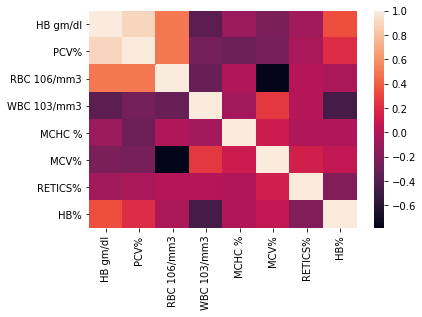

In [17]:
sns.heatmap(test1.corr())

In [18]:
# Shuffle the dataset rows for our train test split after concatenation
from sklearn. utils import shuffle

# Merge dataframes
Mermerged_data = pd.concat([test, test1], ignore_index=True, sort=True)
Mermerged_data = shuffle(Mermerged_data)

In [19]:
test['RBC 106/mm3'].max(),test1['RBC 106/mm3'].max(),Mermerged_data['RBC 106/mm3'].max()

(7.84, 5.077, 7.84)

In [20]:
test['RBC 106/mm3'].min(),test1['RBC 106/mm3'].min(),Mermerged_data['RBC 106/mm3'].min()

(4.0, 2.35, 2.35)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sickle_status', ylabel='count'>

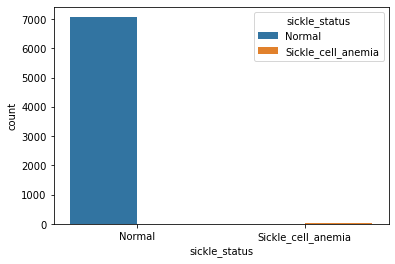

In [22]:
sns.countplot('sickle_status',hue=Mermerged_data.sickle_status,data=Mermerged_data)

In [23]:
Mermerged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7107 entries, 3902 to 1516
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HB gm/dl       7107 non-null   float64
 1   HB%            7107 non-null   float64
 2   MCHC %         7107 non-null   float64
 3   MCV%           7107 non-null   float64
 4   PCV%           7107 non-null   float64
 5   RBC 106/mm3    7107 non-null   float64
 6   RETICS%        38 non-null     float64
 7   WBC 103/mm3    7107 non-null   float64
 8   sickle_status  7107 non-null   object 
dtypes: float64(8), object(1)
memory usage: 875.2+ KB


In [25]:
Mermerged_data = Mermerged_data.drop(['RETICS%'],axis=1)


In [35]:
Mermerged_data.head()

,HB gm/dl,HB%,MCHC %,MCV%,PCV%,RBC 106/mm3,WBC 103/mm3,sickle_status
3902,12.5,25.9,33.2,77.9,37.6,4.84,6.5,Normal
3466,12.4,27.6,34.4,80.3,36.0,4.48,8.0,Normal
7001,15.1,31.6,33.4,94.7,45.1,4.77,6.9,Normal
5335,13.4,27.5,33.9,81.3,39.6,4.87,7.8,Normal
690,12.7,24.4,32.3,75.4,39.2,5.20,5.2,Normal


In [36]:
from sklearn.model_selection import train_test_split
x=Mermerged_data.iloc[:,[0,1,2,5]]
y=Mermerged_data.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,test_size=0.25,)

In [37]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5330, 4), (1777, 4), (5330,), (1777,))

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [39]:
x_train.shape,y_train.shape

((5330, 4), (5330,))

In [40]:
pred=model.predict(x_test)
pred

array(['Normal', 'Normal', 'Normal', ..., 'Normal', 'Normal', 'Normal'],
      dtype=object)

In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix

accuracy_score(y_test, pred)


0.9994372537985369

In [32]:
cn=confusion_matrix(y_test, pred)
cn

array([[1768,    0],
       [   4,    5]], dtype=int64)

<AxesSubplot:>

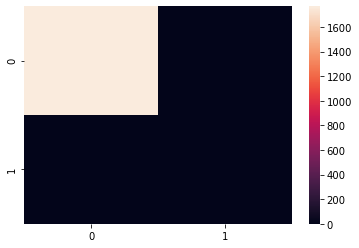

In [33]:
sns.heatmap(cn)

In [34]:
y_test.value_counts()

Normal                1768
Sickle_cell_anemia       9
Name: sickle_status, dtype: int64